# Statistical Outlier Detection

This anomaly detection method involves computing basic statistics about the data and determining outliers based on z-score values. 

How to calculate a z-score for a given data point x:\
z-score = (mean - x)/standard_deviation

We consider an outlier to be any data point outside of a 3 standard deviation range from the mean.

In [1]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Get INTC data from 1985 to 2014
data = yf.Ticker('INTC').history(start='1985-01-01', end='2015-01-01')

c:\Users\Tejas Srivatsav\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Perform exploratory data analysis
print(data.head())
print(data.info())
print(data.describe())

                               Open      High       Low     Close    Volume  \
Date                                                                          
1985-01-02 00:00:00-05:00  0.325247  0.328152  0.316535  0.319440  27259200   
1985-01-03 00:00:00-05:00  0.319440  0.331056  0.319440  0.325247  31075200   
1985-01-04 00:00:00-05:00  0.325247  0.333959  0.325247  0.331055  11688000   
1985-01-07 00:00:00-05:00  0.331055  0.339767  0.328152  0.339767  12465600   
1985-01-08 00:00:00-05:00  0.339767  0.345576  0.322343  0.328152  33734400   

                           Dividends  Stock Splits  
Date                                                
1985-01-02 00:00:00-05:00        0.0           0.0  
1985-01-03 00:00:00-05:00        0.0           0.0  
1985-01-04 00:00:00-05:00        0.0           0.0  
1985-01-07 00:00:00-05:00        0.0           0.0  
1985-01-08 00:00:00-05:00        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7564 entries, 1985-01-

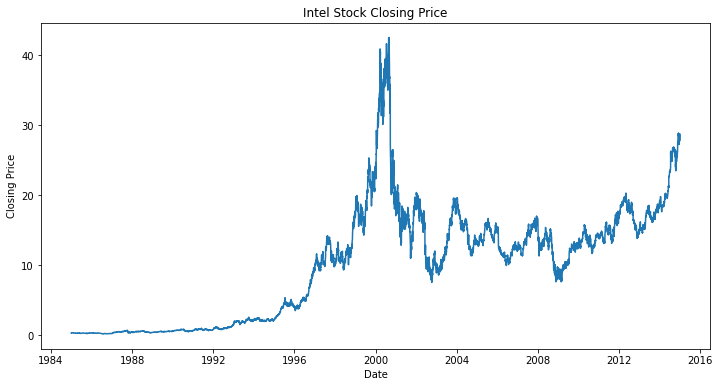

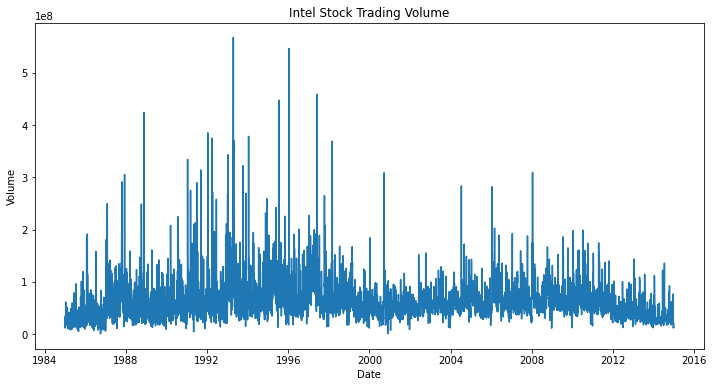

In [3]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Intel Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Plot trading volume
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'])
plt.title('Intel Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [4]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (fill with the previous value)
data.fillna(method='ffill', inplace=True)

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


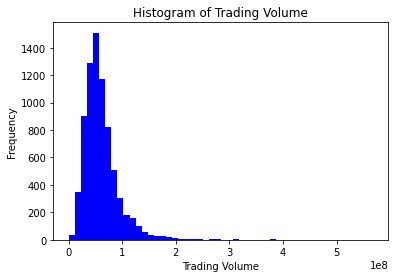

In [5]:
# Plot a histogram of the trading volume
plt.hist(data['Volume'], bins=50, color='blue')
plt.title('Histogram of Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()

It's important to note that the histogram of the data is skewed to the right, meaning that the outliers represent abnormally high trading volume.

In [6]:
# Normalize the closing price and volume
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])
data['Volume'] = scaler.fit_transform(data[['Volume']])

Let's add some technical indicators to our data

In [7]:
# Calculate the daily return
data['Return'] = data['Close'].pct_change()

# Calculate moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['EMA_20'] = data['Close'].ewm(span=20).mean()
data['WMA_30'] = data['Close'].rolling(window=30, win_type='bartlett').mean()

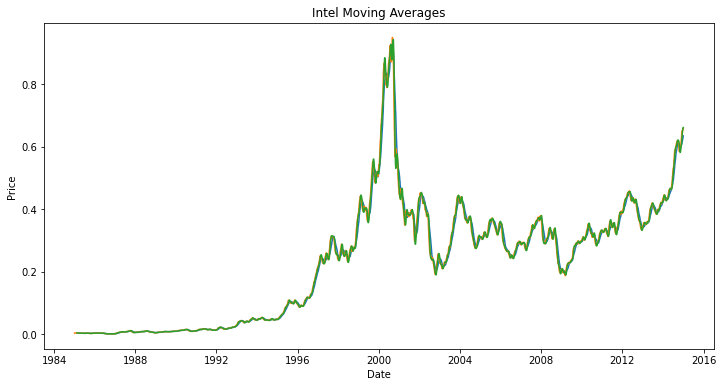

In [11]:
# Plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(data[['SMA_50', 'EMA_20', 'WMA_30']])
plt.title('Intel Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
# plt.legend()
plt.show()

In [12]:
# Calculate relative strength index
def calculate_rsi(data, period=14):
    price_diff = data.diff()
    upward_price_changes = price_diff.clip(lower=0)
    downward_price_changes = price_diff.clip(upper=0).abs()
    avg_upward_changes = upward_price_changes.rolling(window=period).mean()
    avg_downward_changes = downward_price_changes.rolling(window=period).mean()
    rs = avg_upward_changes / avg_downward_changes
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Close'])

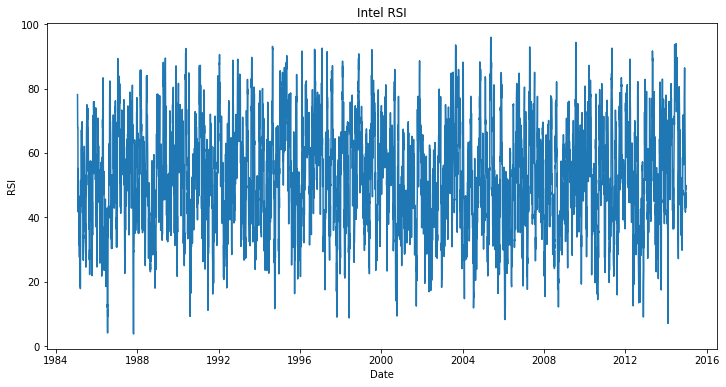

In [13]:
# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(data['RSI'])
plt.title('Intel RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

In [14]:
# Calculate bollinger bands
def calculate_bollinger_bands(data, window=20, std_dev=2):
    sma = data['Close'].rolling(window=window).mean()
    std = data['Close'].rolling(window=window).std()
    upper_band = sma + (std * std_dev)
    lower_band = sma - (std * std_dev)
    return upper_band, lower_band

data['Upper_BB'], data['Lower_BB'] = calculate_bollinger_bands(data)

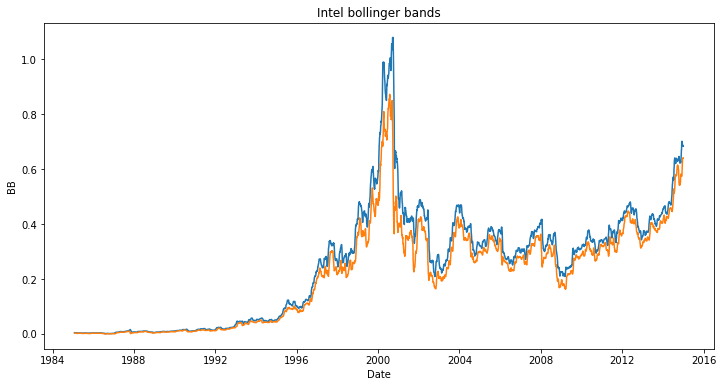

In [17]:
# Plot bollinger bands
plt.figure(figsize=(12, 6))
plt.plot(data[['Upper_BB', 'Lower_BB']])
plt.title('Intel bollinger bands')
plt.xlabel('Date')
plt.ylabel('BB')
# plt.legend()
plt.show()

In [18]:
# Calculate moving average convergence divergence
def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    ema_short = data['Close'].ewm(span=short_period).mean()
    ema_long = data['Close'].ewm(span=long_period).mean()
    macd_line = ema_short - ema_long
    signal_line = macd_line.ewm(span=signal_period).mean()
    return macd_line, signal_line

data['MACD'], data['Signal_Line'] = calculate_macd(data)

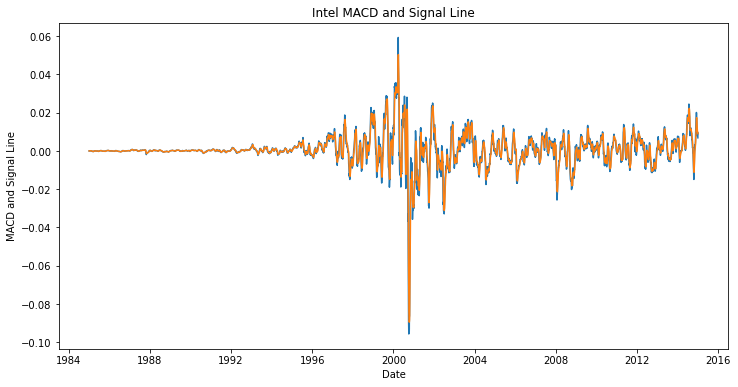

In [19]:
# Plot MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(data[['MACD', 'Signal_Line']])
plt.title('Intel MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD and Signal Line')
plt.show()

In [ ]:
data.to_csv('intc_data.csv', index=False)